### import pandas as pd
train = pd.read_csv('train.csv')

In [2]:
#dosyadaki ilk 5 veriyi gösterir
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#bilgileri verir.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
#Boş degerleri verir
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [39]:
#Title isimli bir sutun oluşturuyoruz
#Bu kod pandas DataFrame içindeki 'Name' sütunundan başlıkları çıkarmaya yarar.
#Yine bu kod, kodlar, nokta ile biten alfabetik karakterlerin dizilerini yakalayarak başlıkları çıkarıyor.
#Bu, "Bay", "Bayan", "Hanımefendi", "Doktor" gibi isimlerdeki başlıklarla uğraşırken sıkça kullanılan bir tekniktir.
train['Title'] = train['Name'].str.extract('([A-Za-z]+)\.', expand=False)
#value_counts() fonksiyonu DataFrame içinde her başlığın kaç kez geçtiğini sayarak, 'Name' sütunundaki başlıkların frekans dağılımını sağlar.
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [6]:
#Regex
#another option:
def name_to_title(name):
    return name.split(',')[1].split('.')[0].strip()

train['Title1'] = train['Name'].apply(name_to_title)
train.Title1.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title1, dtype: int64

In [7]:
#Burada, FamilySize sutunu açacağız kimin kaç akrabası varsa onu göreceğiz. 
#parch: ebeveyn
#SibSp: kardeşleri
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
train.FamilySize.value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64

In [8]:
#fillna() ile bos verileri dolduracağız
#veri normal dağılmamışsa orta degerini alırız. Burada da age sutununu o şekilde doldurduk. Çünkü boş satırlar var.
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"),inplace=True)

In [9]:
train.groupby("Title")["Age"].transform("median")

0      30.0
1      35.0
2      21.0
3      35.0
4      30.0
       ... 
886    46.5
887    21.0
888    21.0
889    30.0
890    30.0
Name: Age, Length: 891, dtype: float64

In [10]:
#Enbarket(Bindiği yer) sutununda iki hücre boş yer vardı.
#value_counts: Hangi limanlardan kaç kişi bindi? onu verir
#3 liman olduğundan en çok hangi limandan binilmişse bosları onunla dolduruyoruz.
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
#Embarked için boş yerleri S ile dolduruyoruz.
train['Embarked'] = train['Embarked'].fillna('S')

In [12]:
train.isnull().sum() #hepsi dolu sadece Cabin sütunu bos oldugu görülüyor

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
Title1           0
FamilySize       0
dtype: int64

In [13]:
#tüm object surtunlarını int sutununa çeviriyoruz.
train1 = train[['Survived', 'Pclass', 'Sex', 'Age', 'FamilySize', 'Embarked']]

In [14]:
#one hat encoding yapıyoruz
#drop_first = True olduğunda bir sutunu siler
train2 = pd.get_dummies(train1, drop_first = True)
train2.head()

,Survived,Pclass,Age,FamilySize,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,2,1,0,1
1,1,1,38.0,2,0,0,0
2,1,3,26.0,1,0,0,1
3,1,1,35.0,2,0,0,1
4,0,3,35.0,1,1,0,1


In [36]:
train2.info() #satır ve sütun sayısını döndürdük

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   FamilySize  891 non-null    int64  
 4   Sex_male    891 non-null    uint8  
 5   Embarked_Q  891 non-null    uint8  
 6   Embarked_S  891 non-null    uint8  
dtypes: float64(1), int64(3), uint8(3)
memory usage: 30.6 KB


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [16]:
%matplotlib inline

In [17]:
x = np.arange(20)
y = np.random.normal(10, 1, 20)
z = np.random.normal(10, 2, 20)

Text(0, 0.5, 'y')

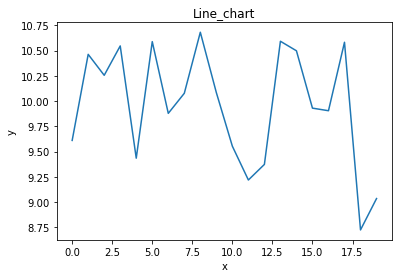

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x,y)
ax.set_title('Line_chart')
ax.set_xlabel('x')
ax.set_ylabel('y')

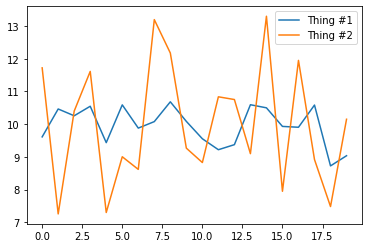

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x,y, label = 'Thing #1') #grafige baslik bu sekilde yazılır.
ax.plot(x,z, label = 'Thing #2')
ax.legend() #legend, çizdirir

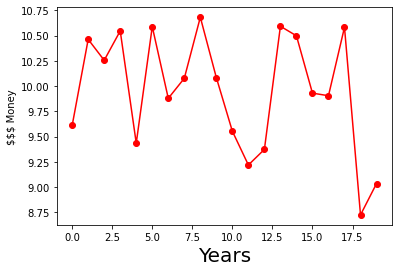

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x,y, marker='o', c='#FF0000')
ax.set_ylabel('$$$ Money', fontsize=10)
ax.set_xlabel('Years', fontsize=20)
fig.savefig('figure.png', dpi=300)

Text(0.5, 0.98, 'Visualization')

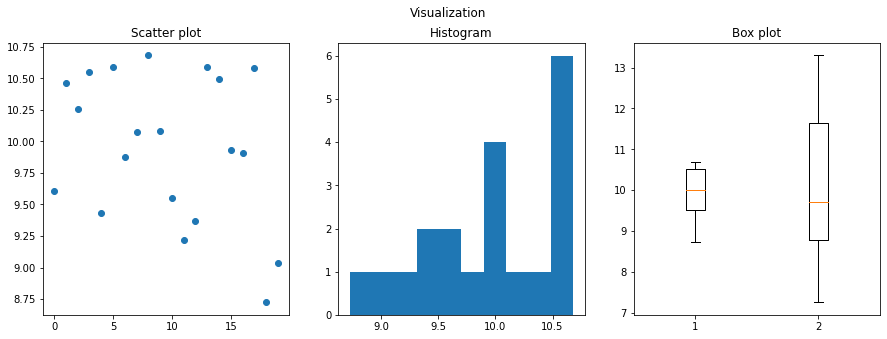

In [21]:
fig2 = plt.figure(figsize = (15,5))
a = fig2.add_subplot(131)
a.scatter(x,y)
a.set_title('Scatter plot')

b = fig2.add_subplot(132)
b.hist(y)
b.set_title('Histogram')

c = fig2.add_subplot(133)
c.boxplot([y,z])
c.set_title('Box plot')

fig2.suptitle('Visualization')

<AxesSubplot:title={'center':'Scatter plot'}, xlabel='Age', ylabel='Fare'>

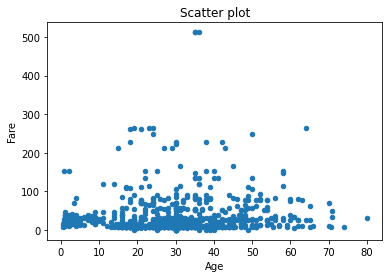

In [22]:
train.plot.scatter(x='Age', y = 'Fare', title= 'Scatter plot')

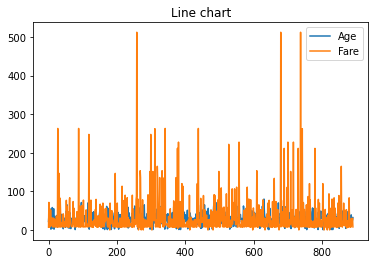

In [23]:
train[['Age','Fare']].plot.line(title='Line chart');

<AxesSubplot:ylabel='Frequency'>

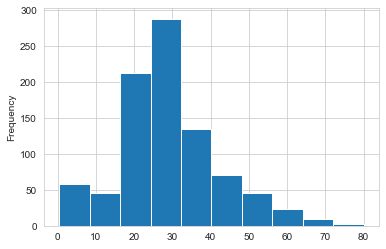

In [37]:
train['Age'].plot.hist()

In [38]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:>

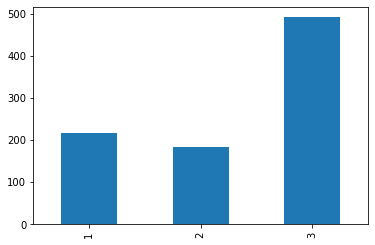

In [24]:
train['Pclass'].value_counts().sort_index().plot.bar()

<AxesSubplot:>

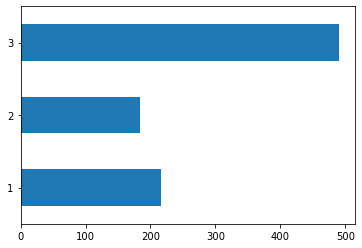

In [25]:
train['Pclass'].value_counts().sort_index().plot.barh()

<AxesSubplot:>

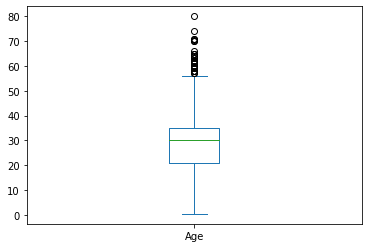

In [26]:
train['Age'].plot.box()

Seaborn

In [27]:
!pip install seaborn


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
import seaborn as sns
sns.set_style('whitegrid')

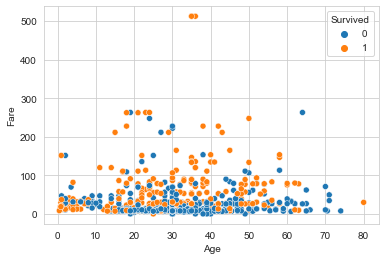

In [29]:
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=train);

<AxesSubplot:>

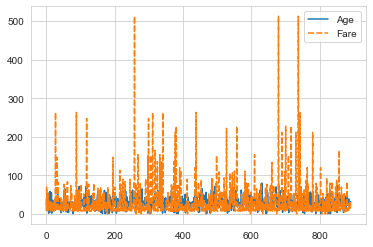

In [30]:
sns.lineplot(data=train[['Age', 'Fare']])

<AxesSubplot:xlabel='Age', ylabel='Density'>

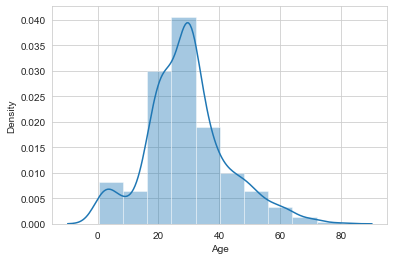

In [31]:
sns.distplot(train['Age'], bins=10, kde=True)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

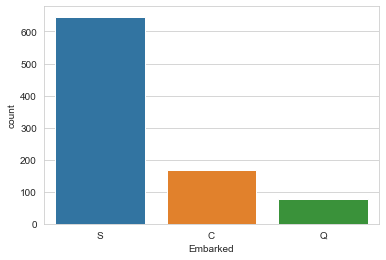

In [32]:
sns.countplot(train['Embarked'])

<AxesSubplot:xlabel='Age', ylabel='Sex'>

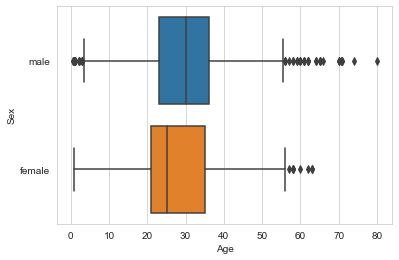

In [33]:
sns.boxplot('Age', 'Sex', data=train)

<AxesSubplot:>

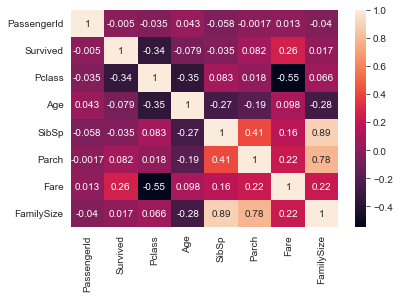

In [34]:
sns.heatmap(train.corr(), annot=True)

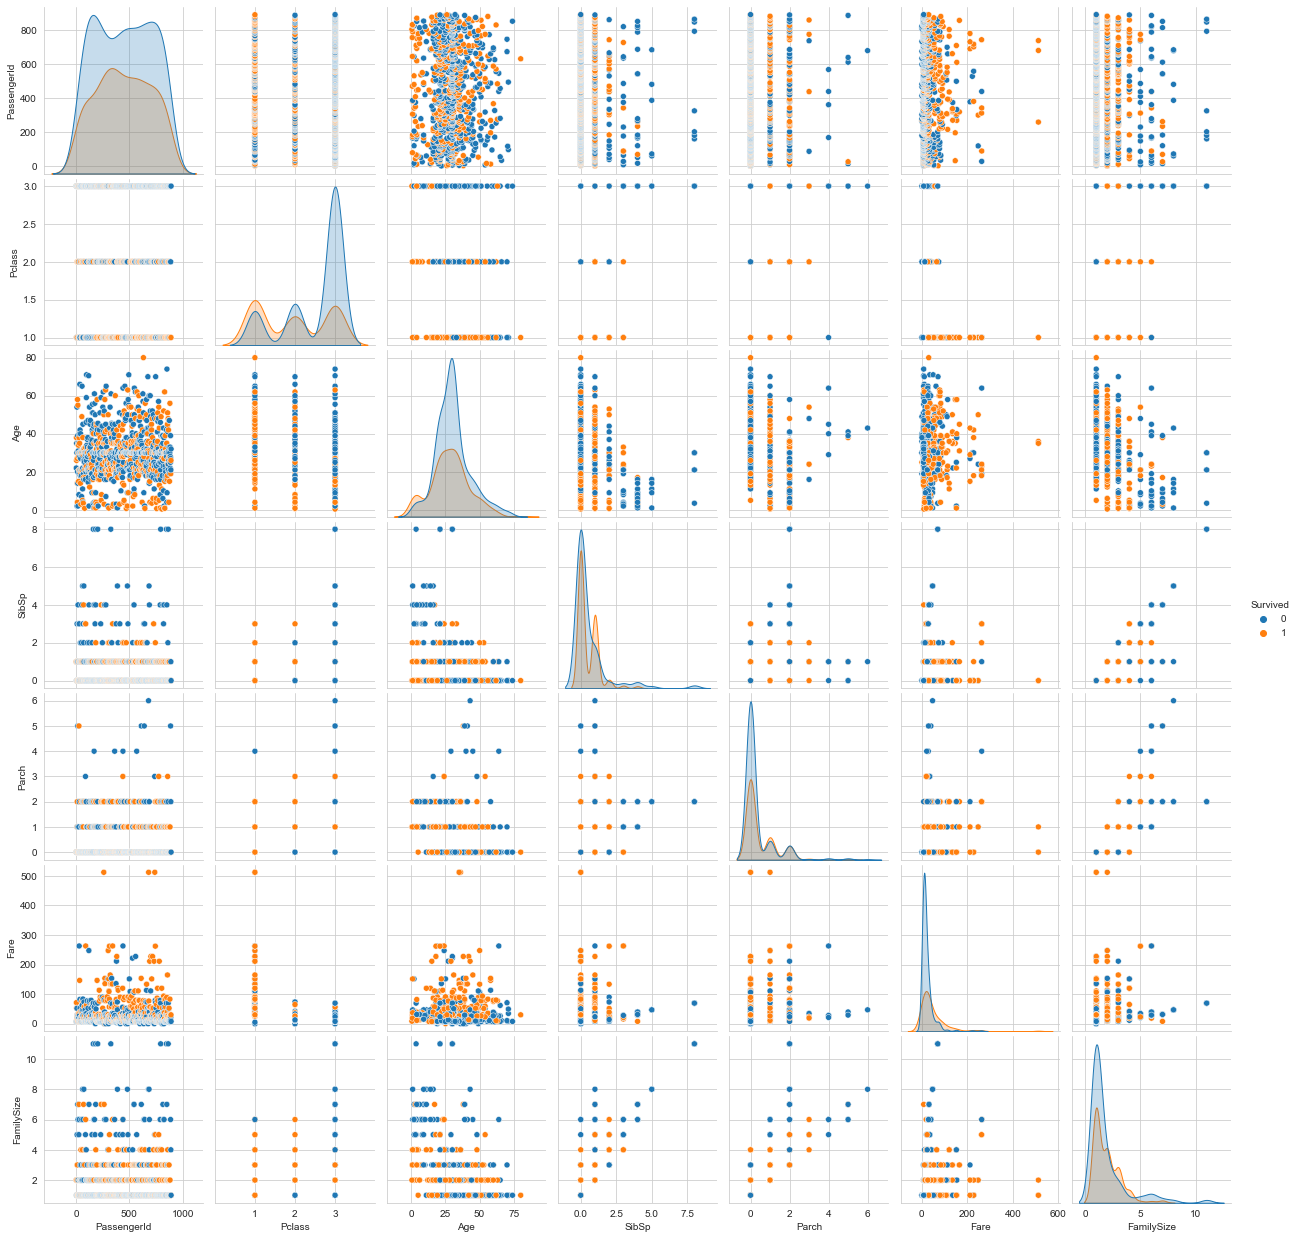

In [35]:
sns.pairplot(train, hue='Survived')
plt.savefig('Pairplot.png')